# A Machine Learning Approach to Glycerin to Glycol Production Analysis
========================================================================================================

## GLYCOL YIELD PREDICTIVE ANALYSIS

In this section, we will develop models to forecast glycol yield based on critical process parameters such as hydrogen, pressure, temperature, pH levels and glycerol feed. The analysis will focus on identifying patterns and relationships among these variables to provide accurate predictions of glycol yield under varying process conditions. These models will serve as a valuable tool for anticipating production outcomes and guiding decision-making in glycol production processes.

## READING THE DATA

### Importing the libraries

Let us start by importing the necessary libraries.



In [50]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor, BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import RepeatedKFold, GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

warnings.filterwarnings('ignore')

### Loading the preprocessed data

We will load the preprocessed data from the 'GeneralAnalysis' notebook.

In [51]:
numerical_df = pd.read_pickle("data/numerical_df.pkl")
no_calc_df = pd.read_pickle("data/no_calc_df.pkl")

In [52]:
display(numerical_df.head())
display(no_calc_df.head())

,Liquid Feed \n(L/h),Pure H2 Gas Flow Setpoint on PLC\n(g/h),Recycled H2 Gas Flow (g/h),Total H2 Gas Flow (g/h),RX-203 Pressure (psig),T2 (Top)\n(°C),T3 \n(°C),T4\n(°C),T5 (Bottom)\n(°C),After HEX (°C),...,Glycerol Feed Area (HPLC),Glycerol Feed Concentration (g/L),Glycerol Remaining Concentration (g/L),EG Concentration (g/L),PG Concentration (g/L),PG/EG Ratio,Conversion (%),EG Yield (%),PG Yield (%),Overall Glycol Yield (%)
1,4.0,250.0,150.0,400,631.0,216.0,219.0,221.0,223.0,227.0,...,7670.7621,581.443767,378.229508,13.219690,208.391724,15.763738,0.349499,0.065053,1.025478,1.090531
3,4.0,250.0,150.0,400,633.0,218.0,221.0,225.0,223.0,228.0,...,7670.7621,581.443767,376.341444,16.838202,264.832496,15.728075,0.352747,0.082097,1.291221,1.373318
5,4.0,250.0,0.0,250,606.0,210.0,213.0,214.0,214.0,239.0,...,7670.7621,581.443767,169.054170,17.034776,323.029406,18.962938,0.709251,0.041307,0.783311,0.824619
6,4.0,250.0,0.0,250,613.0,213.0,215.0,216.0,217.0,239.0,...,7670.7621,581.443767,173.375733,19.375754,335.963875,17.339397,0.701819,0.047482,0.823304,0.870785
7,4.0,250.0,0.0,250,606.0,213.0,216.0,217.0,218.0,239.0,...,7670.7621,581.443767,138.497235,18.031212,303.250974,16.818114,0.761805,0.040707,0.684622,0.725329


,Liquid Feed \n(L/h),Pure H2 Gas Flow Setpoint on PLC\n(g/h),Recycled H2 Gas Flow (g/h),Total H2 Gas Flow (g/h),RX-203 Pressure (psig),T2 (Top)\n(°C),T3 \n(°C),T4\n(°C),T5 (Bottom)\n(°C),After HEX (°C),Average Temp.\n(°C),Feed \npH,Product \npH,Glycerol Area,EG Area,PG Area,Glycerol Feed Area (HPLC),Glycerol Feed Concentration (g/L)
1,4.0,250.0,150.0,400,631.0,216.0,219.0,221.0,223.0,227.0,219.75,11.30,3.56,4989.8352,133.1288,2472.0252,7670.7621,581.443767
3,4.0,250.0,150.0,400,633.0,218.0,221.0,225.0,223.0,228.0,221.75,11.30,3.95,4964.9267,169.5690,3141.5480,7670.7621,581.443767
5,4.0,250.0,0.0,250,606.0,210.0,213.0,214.0,214.0,239.0,212.75,11.15,4.43,2230.2661,171.5486,3831.9028,7670.7621,581.443767
6,4.0,250.0,0.0,250,613.0,213.0,215.0,216.0,217.0,239.0,215.25,11.10,4.43,2287.2788,195.1234,3985.3366,7670.7621,581.443767
7,4.0,250.0,0.0,250,606.0,213.0,216.0,217.0,218.0,239.0,216.00,11.10,4.26,1827.1403,181.5832,3597.2832,7670.7621,581.443767


In [53]:
print(f"numerical_df contains {numerical_df.shape[0]} rows and {numerical_df.shape[1]} columns")
print(f"no_calc_df contains {no_calc_df.shape[0]} rows and {no_calc_df.shape[1]} columns")

numerical_df contains 135 rows and 26 columns
no_calc_df contains 135 rows and 18 columns


## PREDICTIVE MODELLING

### Creating an evaluation metrics function

When predicting glycol yield, it is crucial to evaluate the performance of the models using a variety of metrics to ensure robust and reliable predictions. Each metric offers unique insights into the model's accuracy and error behavior:
* Root Mean Squared Error (RMSE) - provides an intuitive sense of the typical magnitude of errors, expressed in the same unit as the target variable. It heavily penalizes large deviations, making it particularly useful when significant errors are undesirable in glycol yield prediction.
* Mean Absolute Error (MAE) - measures the average size of errors without disproportionately penalizing outliers, offering a straightforward and interpretable assessment of model accuracy. This is helpful when all errors, regardless of their magnitude, are equally important.
* Mean Squared Error (MSE) - emphasizes larger errors even more than RMSE, making it suitable for identifying and addressing extreme discrepancies in predictions. It is also commonly used as a loss function during model training, aiding in optimization.
* Mean Absolute Percentage Error (MAPE) - evaluates errors as a percentage of actual values, making it scale-independent and easy to interpret. This is particularly valuable when comparing the model's performance across different scales of glycol yield or process conditions.
* R-Squared - explains the proportion of variance in the target variable (glycol yield) that is explained by the model's predictors. It provides a holistic view of the model's ability to capture the relationship between input features and the target.

In [54]:
rmse_scores = {}
r2_scores = {}
mae_scores = {}
mape_scores = {}


def evaluate_model(model_name, model, model_result, X_test, y_test):
    best_model = model.best_estimator_
    y_pred = best_model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100

    rmse_scores[model_name] = -model_result.best_score_
    r2_scores[model_name] = r2
    mae_scores[model_name] = mae
    mape_scores[model_name] = mape

    print(f"Best parameters for {model_name}: {model_result.best_params_}")
    print(f"{model_name} RMSE: {-model_result.best_score_:.2f}")
    print(f"{model_name} R^2 Score: {r2:.2f}%")
    print(f"{model_name} MAE: {mae:.2f}")
    print(f"{model_name} MAPE: {mape:.2f}%")

### Selecting features

We used the 'Overall Glycol Yield (%)' as target variable. Before building the model, we carefully selected the features to ensure relevance and minimize redundancy. The following adjustments were made:

* Utilized the average temperature (Ave. Temp) instead of the individual temperature readings (T2, T3, T4, and T5) for simplicity and to reduce multicollinearity.
* Removed the highly correlated feature glycerol feed area, as it strongly correlates with glycerol feed concentration.
* Excluded total H2 gas flow since it is a derived feature, representing the sum of pure H2 gas flow and recycled H2 gas flow.

In [55]:
uncontrolled_factors = [
    'T2 (Top)\n(°C)',
    'T3 \n(°C)',
    'T4\n(°C)',
    'T5 (Bottom)\n(°C)',
]

output_factors = [
    'Product \npH',
    #'Glycerol Area',
    'EG Area',
    #'PG Area',
]

highly_correlated_factors = [
    'Glycerol Feed Area (HPLC)',  # with Glycerol Feed Concentration (g/L)
    'Total H2 Gas Flow (g/h)',
    #'Glycerol Feed Concentration (g/L)'
]

factors_to_remove = uncontrolled_factors + output_factors + highly_correlated_factors

y = numerical_df['Overall Glycol Yield (%)']
X = no_calc_df.drop(columns=factors_to_remove, axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=101)

cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=101)

In [56]:
X.columns.tolist()

['Liquid Feed \n(L/h)',
 'Pure H2 Gas Flow Setpoint on PLC\n(g/h)',
 'Recycled H2 Gas Flow (g/h)',
 'RX-203 Pressure (psig)',
 'After HEX (°C)',
 'Average Temp.\n(°C)',
 'Feed \npH',
 'Glycerol Area',
 'PG Area',
 'Glycerol Feed Concentration (g/L)']

### Random Forest Analysis

Best for: high-dimensional data | Pros: robust to overfitting, handles feature importance | Cons: slow to train, hard to interpret individual trees

In [57]:
rf_model = RandomForestRegressor(warm_start=True, random_state=101, n_jobs=-1)

rf_param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_leaf_nodes': [None, 2, 5],
    'min_samples_leaf': [2, 5],
}

rf_search = GridSearchCV(rf_model, rf_param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=cv)

In [58]:
rf_result = rf_search.fit(X_train, y_train)

evaluate_model("Random Forest", rf_search, rf_result, X_test, y_test)

Best parameters for Random Forest: {'max_depth': 20, 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest RMSE: 0.09
Random Forest R^2 Score: 0.50%
Random Forest MAE: 0.07
Random Forest MAPE: 8.80%


The model demonstrates moderate predictive performance. The relatively low RMSE, MAE, and MAPE indicate that the Random Forest model performs reasonably well for this dataset. However, the R² value of 0.50 highlights potential gaps in fully capturing the patterns in the data.



### Linear/Ridge/Lasso Regression

Linear | Best for: simple relationships, small datasets | Pros: easy to interpret, fast to train | Cons: sensitive to outliers, assumes linearity

Ridge | Best for: data with multi collinearity, small datasets | Pros: handles multi collinearity, prevents overfitting

Lasso | Best for: sparse models, feature selection | Pros: automatic feature selection

In [59]:
lr_model = LinearRegression(n_jobs=-1)
ridge_model = Ridge(random_state=101)
lasso_model = Lasso(warm_start=True, random_state=101)

lr_param_grid = {
    'fit_intercept': [True, False],
}

ridge_param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10, 100],
    'fit_intercept': [True, False],
    'max_iter': [None, 1000, 5000, 10000],
    'tol': [1e-3, 1e-4, 1e-5]
}

lasso_param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10, 100],
    'fit_intercept': [True, False],
    'precompute': [True, False],
    'tol': [1e-3, 1e-4, 1e-5],
    'selection': ['cyclic', 'random']
}

lr_search = GridSearchCV(lr_model, lr_param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=cv)

ridge_search = GridSearchCV(ridge_model, ridge_param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=cv)

lasso_search = GridSearchCV(lasso_model, lasso_param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=cv)

In [60]:
lr_result = lr_search.fit(X_train, y_train)

evaluate_model("Linear", lr_search, lr_result, X_test, y_test)

Best parameters for Linear: {'fit_intercept': True}
Linear RMSE: 0.03
Linear R^2 Score: 0.80%
Linear MAE: 0.04
Linear MAPE: 5.72%


In [61]:
ridge_result = ridge_search.fit(X_train, y_train)

evaluate_model("Ridge", ridge_search, ridge_result, X_test, y_test)

Best parameters for Ridge: {'alpha': 0.01, 'fit_intercept': True, 'max_iter': None, 'tol': 0.001}
Ridge RMSE: 0.03
Ridge R^2 Score: 0.80%
Ridge MAE: 0.04
Ridge MAPE: 5.71%


In [62]:
lasso_result = lasso_search.fit(X_train, y_train)

evaluate_model("Lasso", lasso_search, lasso_result, X_test, y_test)

Best parameters for Lasso: {'alpha': 0.01, 'fit_intercept': True, 'precompute': False, 'selection': 'cyclic', 'tol': 1e-05}
Lasso RMSE: 0.06
Lasso R^2 Score: 0.60%
Lasso MAE: 0.05
Lasso MAPE: 6.59%


Linear Regression and Ridge Regression both perform exceptionally well, with minimal prediction error and strong explanatory power (80% of variance captured). Either model is suitable, but Ridge might offer better stability in scenarios with collinearity or noisy data.

While the Lasso model has moderate performance, its RMSE (0.06) and R² (0.60) suggest that it captures less variance compared to the other two models. This could be due to the Lasso’s tendency to shrink coefficients to zero, which may have excluded some important predictors. However, its MAPE (6.5%) and MAE (0.05) still indicate reasonable performance.

### SGD Regressor

Best for: large datasets | Pros: efficient with large datasets | Cons: requires careful tuning, sensitive to learning rate and regularization settings

In [63]:
sgd_model = SGDRegressor(warm_start=True, random_state=101)

sgd_param_grid = {
    'loss': ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [1e-5, 1e-4, 1e-3],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.001, 0.01, 0.1],
    'max_iter': [1000, 2000, 5000, 1000],
    'tol': [1e-3, 1e-4, 1e-5],
    'fit_intercept': [True, False]
}

sgd_search = GridSearchCV(sgd_model, sgd_param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=cv)

In [64]:
sgd_result = sgd_search.fit(X_train, y_train)

evaluate_model("SGD", sgd_search, sgd_result, X_test, y_test)

Best parameters for SGD: {'alpha': 1e-05, 'eta0': 0.1, 'fit_intercept': True, 'learning_rate': 'adaptive', 'loss': 'squared_error', 'max_iter': 1000, 'penalty': 'l2', 'tol': 0.001}
SGD RMSE: 0.03
SGD R^2 Score: 0.78%
SGD MAE: 0.05
SGD MAPE: 6.26%


SGD model achieves strong predictive performance with a very low error (RMSE and MAE) and captures 78% of the variance in the target variable. This demonstrates that the features used are effective in explaining the target, though there is still room for improvement to reach the 80% benchmark achieved by Linear and Ridge regression models.

The SGD model’s regularization (L2 penalty) and adaptive learning rate likely contribute to its robustness and ability to avoid overfitting. However, it slightly underperforms compared to the Linear and Ridge models, which have slightly higher R² scores.

### Decision Tree Regressor

Best for: non-linear relationships, easy to interpret models | Pros: easy to visualize, no need for feature scaling | Cons: prone to overfitting without tuning

In [65]:
dt_model = DecisionTreeRegressor(random_state=101)

dt_param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'max_leaf_nodes': [None, 10, 20, 30]
}

dt_search = GridSearchCV(dt_model, dt_param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=cv)

In [66]:
dt_result = dt_search.fit(X_train, y_train)

evaluate_model("Decision Tree", dt_search, dt_result, X_test, y_test)

Best parameters for Decision Tree: {'criterion': 'absolute_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
Decision Tree RMSE: 0.10
Decision Tree R^2 Score: 0.40%
Decision Tree MAE: 0.08
Decision Tree MAPE: 10.35%


Decision Tree model has moderate predictive performance. While it captures some patterns in the data (40% of variance explained), a large portion of the variability remains unaccounted for, as reflected in the low R² score. The moderate RMSE and MAE further highlight the model's limitations in making precise predictions.

### KNN Regressor

Best for: non-linear relationships, small to medium datasets | Pros: simple, no assumptions about data distribution | Cons: sensitive to noise, memory-heavy for large datasets

In [67]:
knn_model = KNeighborsRegressor(n_jobs=-1)

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50, 100],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_search = GridSearchCV(knn_model, knn_param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=cv)

In [68]:
knn_result = knn_search.fit(X_train, y_train)

evaluate_model("KNN", knn_search, knn_result, X_test, y_test)

Best parameters for KNN: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
KNN RMSE: 0.10
KNN R^2 Score: 0.56%
KNN MAE: 0.07
KNN MAPE: 9.77%


The KNN model provides a moderate predictive performance. With an R² score of 0.56, it captures slightly over half of the variance in the target variable, which is reasonable but not outstanding. The error metrics (RMSE, MAE, MAPE) are moderate and suggest that the model's predictions are reasonably accurate.

### Bayesian Regression

Best for: small datasets, need uncertainty estimates | Pros: provides uncertainty estimates on predictions | Cons: computationally expensive for large datasets

In [69]:
bayesian_model = BayesianRidge()

bayesian_param_grid = {
    'alpha_1': [1e-6, 1e-3, 1.0, 1e3],
    'alpha_2': [1e-6, 1e-3, 1.0, 1e3],
    'lambda_1': [1e-6, 1e-3, 1.0, 1e3],
    'lambda_2': [1e-6, 1e-3, 1.0, 1e3],
    'tol': [1e-3, 1e-4, 1e-5],
    'max_iter': [None, 1000, 5000, 10000],
    'fit_intercept': [True, False]
}

bayesian_search = GridSearchCV(bayesian_model, bayesian_param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1,
                               cv=cv)

In [70]:
bayesian_result = bayesian_search.fit(X_train, y_train)

evaluate_model("Bayesian Ridge", bayesian_search, bayesian_result, X_test, y_test)

Best parameters for Bayesian Ridge: {'alpha_1': 1000.0, 'alpha_2': 1e-06, 'fit_intercept': True, 'lambda_1': 1e-06, 'lambda_2': 1000.0, 'max_iter': None, 'tol': 0.001}
Bayesian Ridge RMSE: 0.03
Bayesian Ridge R^2 Score: 0.80%
Bayesian Ridge MAE: 0.04
Bayesian Ridge MAPE: 5.72%


The Bayesian Ridge model achieves strong predictive performance with very low error metrics (RMSE, MAE, MAPE) and explains 80% of the variance in the target variable. These results indicate that the model effectively captures the underlying patterns in the data and makes highly accurate predictions. It performs on par with the Linear and Ridge regression models and can be preferred when interpretability, regularization, and uncertainty estimation are important considerations.

### MLP Regressor

Best for: capturing complex, non-linear relationships |
Pros: flexible, can model highly non-linear relationships; can handle large amounts of data |
Cons: requires careful tuning of architecture and hyperparameters; prone to overfitting without proper regularization

In [71]:
mlp = MLPRegressor(warm_start=True, random_state=101)

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [500, 1000],
}

mlp_search = GridSearchCV(mlp, param_grid, cv=cv, scoring='neg_root_mean_squared_error', n_jobs=-1)

In [72]:
mlp_result = mlp_search.fit(X_train, y_train)

evaluate_model("MLP", mlp_search, mlp_result, X_test, y_test)

Best parameters for MLP: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01, 'max_iter': 500}
MLP RMSE: 0.05
MLP R^2 Score: 0.89%
MLP MAE: 0.03
MLP MAPE: 3.83%


The MLP model shows outstanding predictive performance with very low error metrics (RMSE, MAE, MAPE) and an R² score of 0.89. This indicates that the model effectively captures nearly all the variance in the target variable, making it one of the best-performing models in this analysis.

### XGB Regressor

Best for: structured/tabular data with complex patterns |
Pros: highly accurate, handles missing values and outliers well, fast training with parallelization |
Cons: sensitive to noisy data and outliers; requires careful hyperparameter tuning

In [73]:
xgb_model = XGBRegressor(random_state=101, n_jobs=-1)

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

xgb_search = GridSearchCV(xgb_model, xgb_param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=cv)

In [74]:
xgb_result = xgb_search.fit(X_train, y_train)

evaluate_model("XGB", xgb_search, xgb_result, X_test, y_test)

Best parameters for XGB: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}
XGB RMSE: 0.10
XGB R^2 Score: 0.75%
XGB MAE: 0.05
XGB MAPE: 6.22%


XGBoost model provides strong predictive performance with low error metrics (RMSE, MAE, and MAPE) and explains 80% of the variance in the target variable. This indicates that the model captures most patterns in the data while maintaining good accuracy.

### Stacked Regression

Best for: improving predictive performance through ensemble learning |
Pros: combines multiple models to reduce bias and variance; can leverage the strengths of different algorithms |
Cons: complex to implement and tune; risk of overfitting if base models are not properly selected

In [75]:
base_models = [
    ('lr', lr_search.best_estimator_),
    ('lasso', lasso_search.best_estimator_),
    ('ridge', ridge_search.best_estimator_),
    ('sgd', sgd_search.best_estimator_),
    ('mlp', mlp_search.best_estimator_),
    ('rf', rf_search.best_estimator_),
]

meta_model = bayesian_search.best_estimator_

stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, n_jobs=-1)

stacking_model.fit(X_train, y_train)

y_pred_stacking = stacking_model.predict(X_test)

rmse_stacking = mean_squared_error(y_test, y_pred_stacking, squared=False)
r2_stacking = r2_score(y_test, y_pred_stacking)
mae_stacking = mean_absolute_error(y_test, y_pred_stacking)
mape_stacking = mean_absolute_percentage_error(y_test, y_pred_stacking) * 100

rmse_scores['Stacked'] = rmse_stacking
r2_scores['Stacked'] = r2_stacking
mae_scores['Stacked'] = mae_stacking
mape_scores['Stacked'] = mape_stacking

print(f"Stacking RMSE: {rmse_stacking:.2f}")
print(f"Stacking R^2 Score: {r2_stacking:.2f}")
print(f"Stacking MAE Score: {mae_stacking:.2f}")
print(f"Stacking MAPE Score: {mape_stacking:.2f}%")

Stacking RMSE: 0.08
Stacking R^2 Score: 0.77
Stacking MAE Score: 0.04
Stacking MAPE Score: 5.72%


Stacking model performs well, achieving low error metrics (RMSE, MAE, and MAPE) while explaining 77% of the variance in the target variable. This suggests that the ensemble approach effectively combines the strengths of multiple base models to deliver accurate predictions, though it does not outperform some of the top-performing individual models like MLP or Ridge Regression.

## MULTIPLE MODEL COMPARISONS

Let us store all model evaluation metrics for all models in a dictionary for ease of access.

In [76]:
sorted_rmse_scores = dict(sorted(rmse_scores.items(), key=lambda item: item[1], reverse=True))
sorted_r2_scores = dict(sorted(r2_scores.items(), key=lambda item: item[1]))
sorted_mae_scores = dict(sorted(mae_scores.items(), key=lambda item: item[1], reverse=True))
sorted_mape_scores = dict(sorted(mape_scores.items(), key=lambda item: item[1], reverse=True))

### RMSE Scores

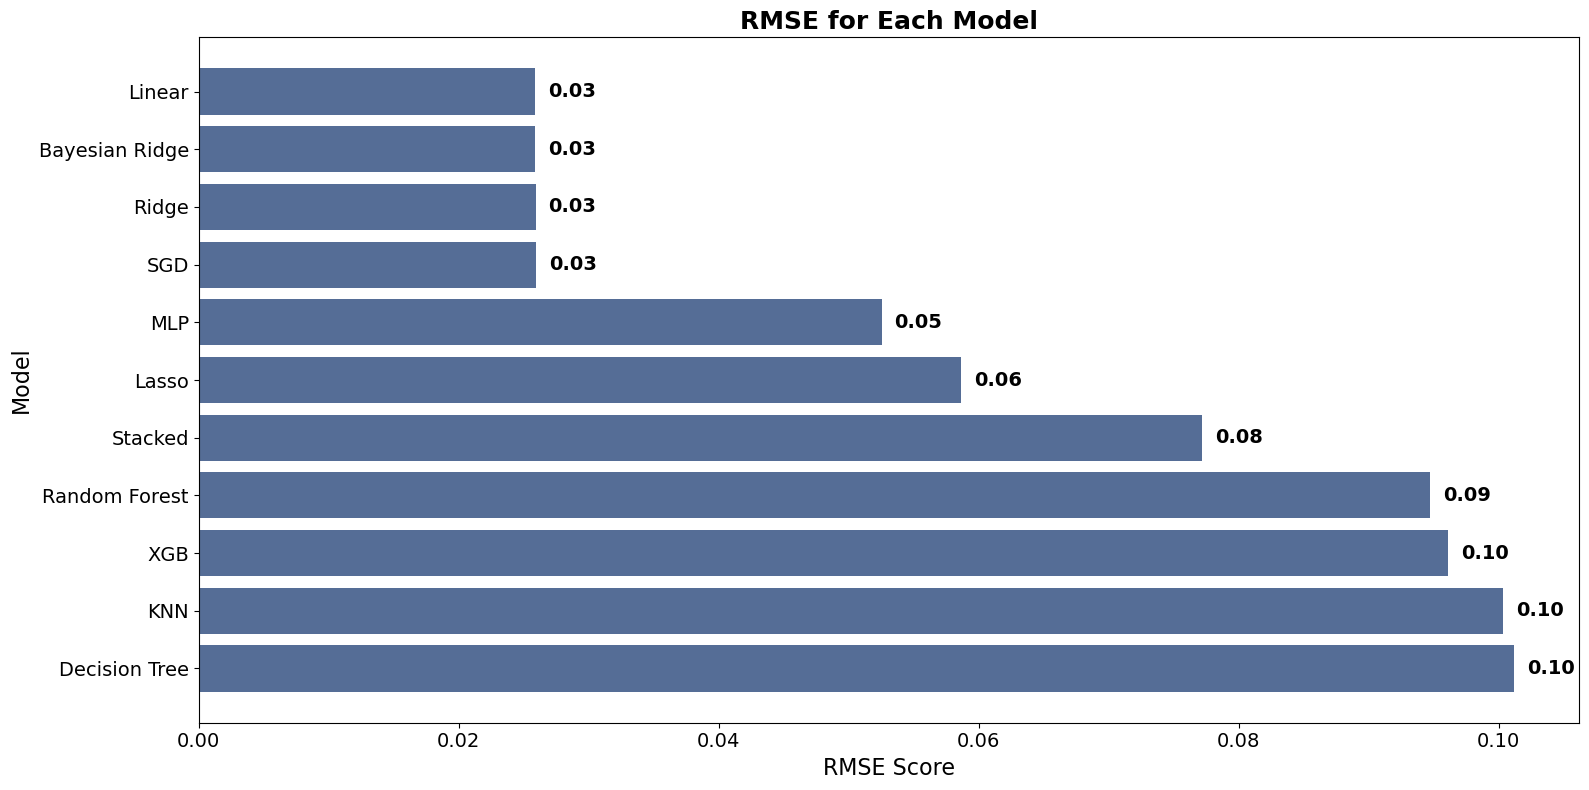

In [77]:
plt.figure(figsize=(16, 8))

plt.barh(list(sorted_rmse_scores.keys()), list(sorted_rmse_scores.values()), color='#556d96')

plt.title('RMSE for Each Model', fontsize=18, fontweight='bold')
plt.xlabel('RMSE Score', fontsize=16)
plt.ylabel('Model', fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

for model, rmse in sorted_rmse_scores.items():
    plt.text(rmse + 0.001, model, f"{rmse:.2f}", va='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

* Linear and Regularized Models: Ridge, Bayesian Ridge, and Linear Regression dominate in performance, suggesting that the dataset exhibits strong linear patterns.
* MLP Performance: The MLP's low RMSE indicates its ability to handle non-linearities, even though it doesn’t outperform simpler linear models here.
* Tree-Based Models: Decision Tree and Random Forest underperform, reflecting their limitations in this context, possibly due to insufficient data complexity or overfitting.
* Stacked Model: While the stacking ensemble reduces error compared to single models like Decision Tree or Random Forest, it doesn't outperform simpler linear models, indicating limited added value.

### R-Square Scores

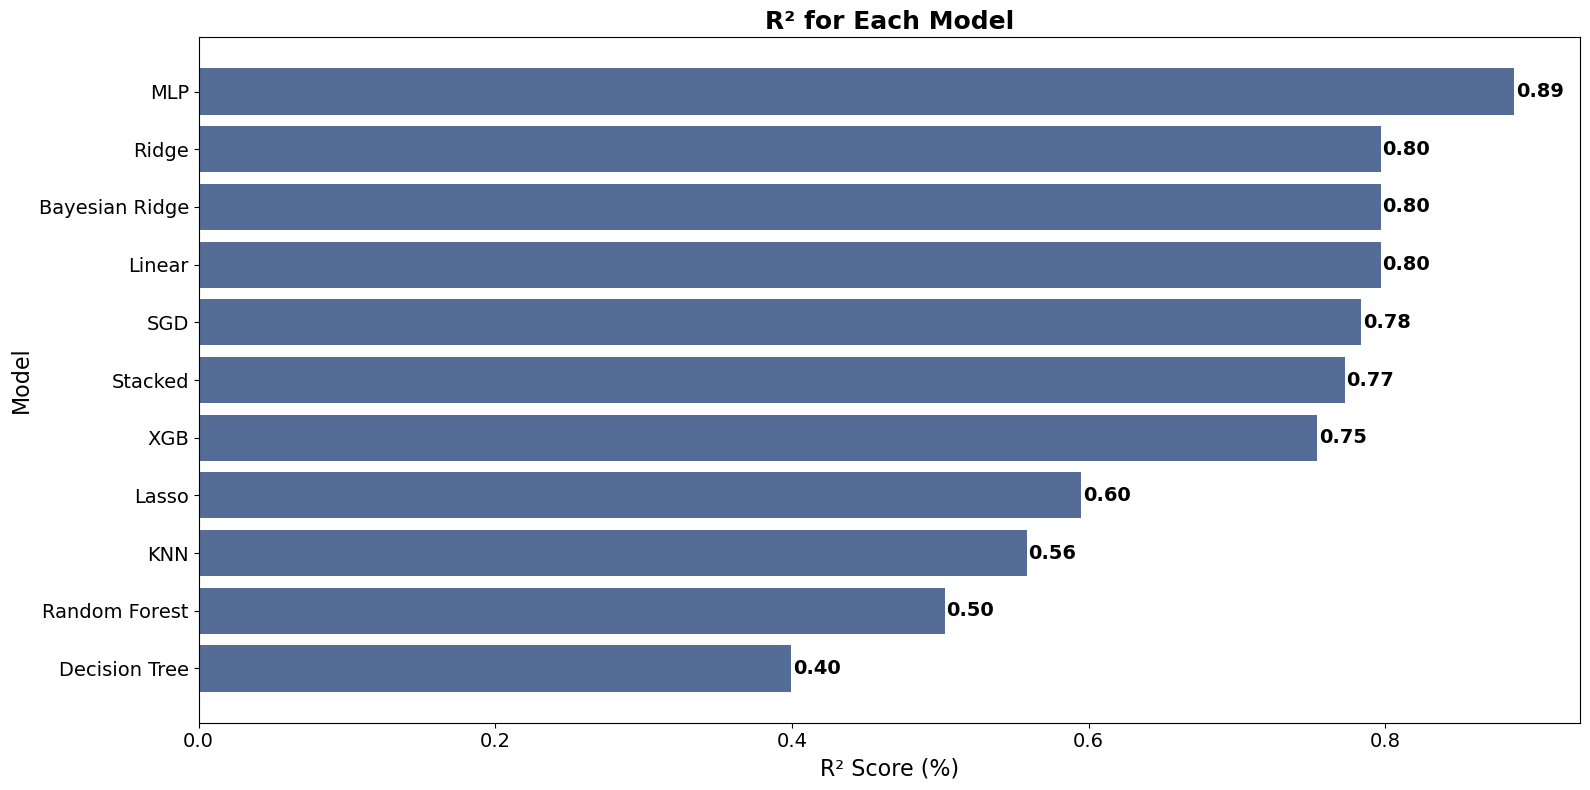

In [78]:
plt.figure(figsize=(16, 8))

plt.barh(list(sorted_r2_scores.keys()), list(sorted_r2_scores.values()), color='#556d96')

plt.title('R² for Each Model', fontsize=18, fontweight='bold')
plt.xlabel('R² Score (%)', fontsize=16)
plt.ylabel('Model', fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

for model, r2 in sorted_r2_scores.items():
    plt.text(r2 + 0.001, model, f"{r2:.2f}", va='center', fontsize=14, fontweight='bold')

plt.tight_layout()

plt.show()

* Best Models: The MLP model is the most effective at explaining variance, followed by Ridge, Bayesian Ridge, Linear Regression, and XGBoost, which all perform similarly.
* Ensemble Models: The Stacked Model shows decent performance (R² = 0.77) but does not outperform simpler individual models like Ridge or Linear Regression.
* Underperforming Models: Decision Tree, Random Forest, and KNN fail to explain sufficient variance, indicating they are less suitable for this dataset.

### MAE Scores

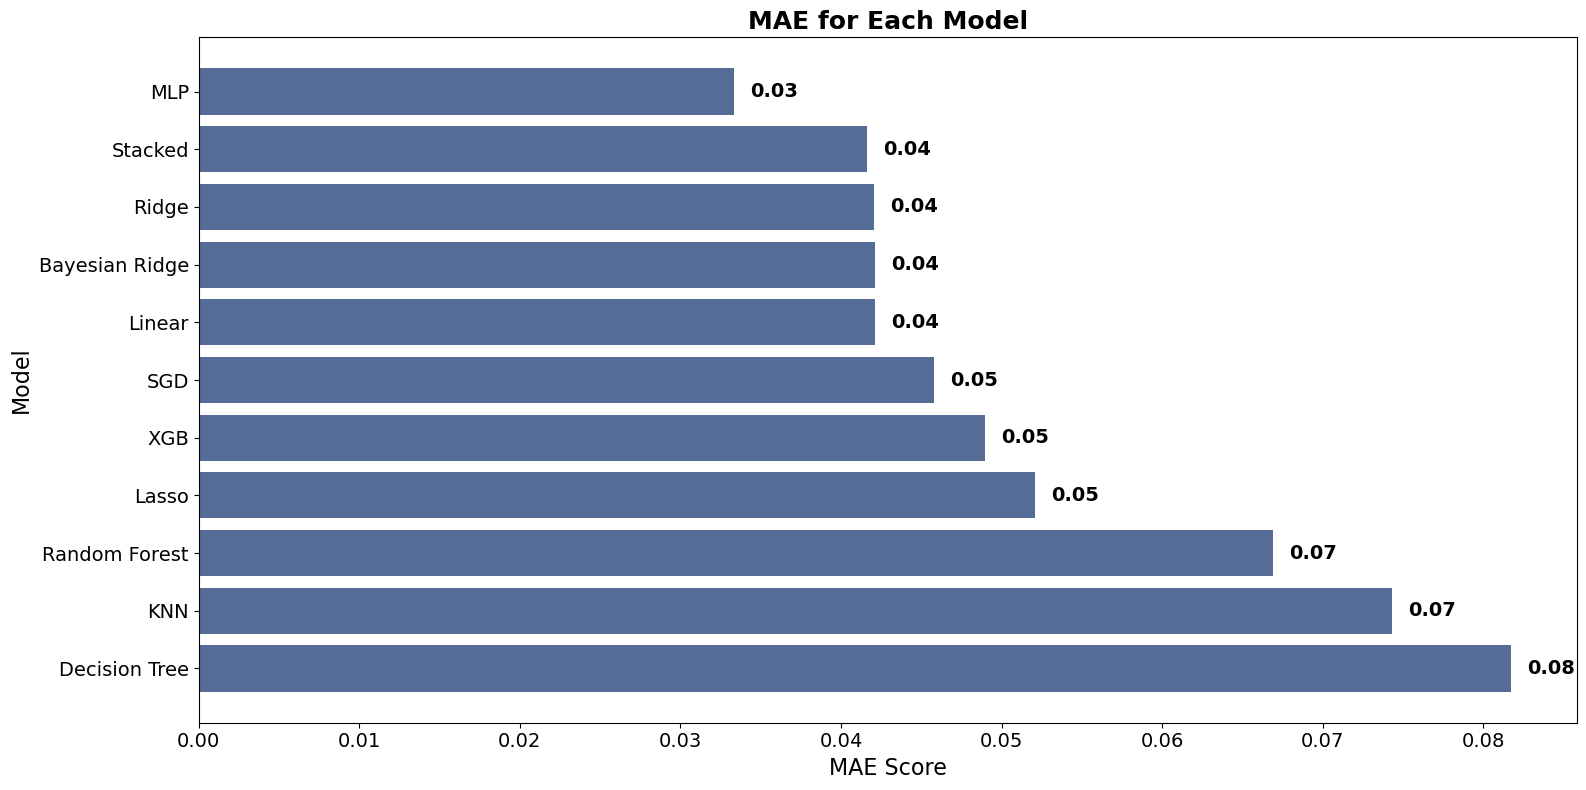

In [79]:
plt.figure(figsize=(16, 8))

plt.barh(list(sorted_mae_scores.keys()), list(sorted_mae_scores.values()), color='#556d96')

plt.title('MAE for Each Model', fontsize=18, fontweight='bold')
plt.xlabel('MAE Score', fontsize=16)
plt.ylabel('Model', fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

for model, mae in sorted_mae_scores.items():
    plt.text(mae + 0.001, model, f"{mae:.2f}", va='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

* Best Model: The MLP model has the lowest MAE, indicating it provides the most precise predictions on average.
* Strong Contenders: Linear Regression, Bayesian Ridge, Ridge and Stacked models are all strong alternatives, with MAE values of 0.04, reflecting high accuracy and reliability.
* Weaker Models: Decision Tree, KNN, and Random Forest exhibit significantly higher errors, making them less reliable choices for this dataset.

### MAPE Scores

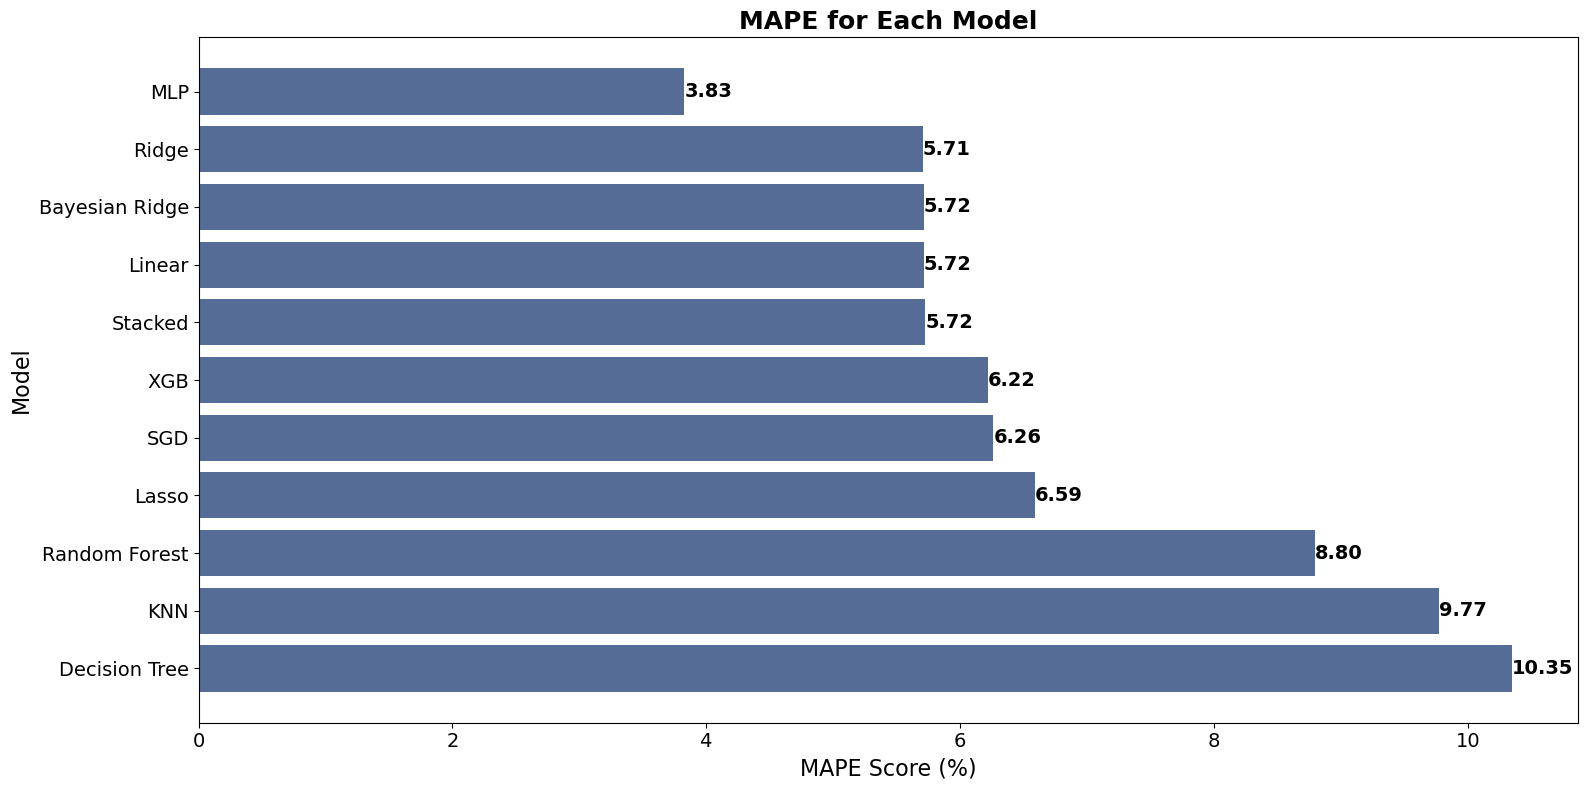

In [80]:
plt.figure(figsize=(16, 8))

plt.barh(list(sorted_mape_scores.keys()), list(sorted_mape_scores.values()), color='#556d96')

plt.title('MAPE for Each Model', fontsize=18, fontweight='bold')
plt.xlabel('MAPE Score (%)', fontsize=16)
plt.ylabel('Model', fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

for model, mape in sorted_mape_scores.items():
    plt.text(mape + 0.001, model, f"{mape:.2f}", va='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

* Best Model: The MLP model stands out with the lowest relative error (3.83%), making it the most reliable in terms of percentage-based accuracy.
* Strong Contenders: Ridge, Bayesian Ridge, Linear Regression, and XGBoost offer excellent performance, with low MAPE values that demonstrate their ability to generalize well.
* Weaker Models: Decision Tree, KNN, and Random Forest have much higher MAPE scores, indicating that they are less suitable for this dataset.

## CONCLUSION

Based on the performance metrics across all evaluated models (RMSE, R², MAE, and MAPE), the Multi-Layer Perceptron (MLP) emerges as the best model to predict the overall glycol yield. These results highlight the MLP model's ability to handle both linear and non-linear relationships in the data effectively, making it the most accurate and reliable choice for predicting glycol yield.

Ridge, Bayesian Ridge, Linear Regression, and XGBoost: These models also perform exceptionally well, with slightly higher errors but strong generalization capabilities. They are viable options when simplicity, interpretability, or computational efficiency is prioritized.